In [92]:
# HASHTAGS Jaccard Similarity

import pandas as pd
import glob
import re
import math
import urllib.request
# from bs4 import BeautifulSoup
from operator import itemgetter
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt
import itertools
from scipy.spatial import distance
from math import *
import numpy as np


def native_vote_csv_df():
    list_ = []

    filepath = "/Users/tdt62/Desktop/test_data/2018_10_*vote*"


    # Takes all of the csv file and makes one big dataframe
    for name in glob.glob(filepath):
        if(os.stat(name).st_size == 0) == True:
            continue
        else:
            df = pd.read_csv(name, index_col=None, sep="\t")
            list_.append(df)

    # Makes the big df in memory
    frame = pd.concat(list_, axis = 0, ignore_index = True)
    frame.fillna("NA", inplace=True)
    
    return frame

def total_tweets(df):

    # Gets the total number of tweets
    total_tweets_num = df.shape[0]  # gives number of row count
    return total_tweets_num

def get_hashtag_users_df(df):
        hashtag_users_df = df.loc[(df['Hashtags'] != '[]')]
        return hashtag_users_df

def build_mentions_dict(df):

    def make_csv(user_hashtag_dict):
        with open('user_hashtag.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])

    def make_jaccard_csv(user_hashtag_dict):
        with open('jaccard_domain.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])

    def jaccard_similarity(x,y):
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)

    df = get_hashtag_users_df(df)
    df.dropna(inplace=True)
    domain_list = list(zip(df['Hashtags'], df['User_ID']))

    domain_dict = {}

    for user_domain in domain_list:
        user_domain_list = str(user_domain[0]).split(',')
#         print(user_domain)
        if len(user_domain_list) == 1:
            stripped_domain = str(user_domain_list[0]).strip("()[] ").lower()
            if(stripped_domain in domain_dict and user_domain[1] != 'na' and stripped_domain != 'na'):
                tmp_list = domain_dict[stripped_domain]
                tmp_list.append(str(user_domain[1]).strip("()[] "))
                domain_dict[stripped_domain] = tmp_list
            else:
                domain_dict[stripped_domain] = [str(user_domain[1]).strip("()[] ")]
        else:
            for domain in user_domain_list:
                stripped_domain = str(domain).strip("()[] ").lower()
                if(stripped_domain in domain_dict and user_domain[1] != 'na' and stripped_domain != 'na'):
                    tmp_list = domain_dict[stripped_domain]
                    tmp_list.append(user_domain[1])
                    domain_dict[stripped_domain] = tmp_list
                else:
                    domain_dict[stripped_domain] = [user_domain[1]]

    make_csv(domain_dict)
    hash_df = pd.read_csv("user_hashtag.csv", names=['User_Hashtags', 'Count'])
    hash_df.dropna(inplace=True)

    jaccard_domain_dict = {}

    for pair in itertools.product(hash_df['User_Hashtags'][2:], repeat=2):
        jaccard_domain_dict[pair] = jaccard_similarity(*pair)

    make_jaccard_csv(jaccard_domain_dict)

    return hash_df

native_df = native_vote_csv_df()

# native_df['Hashtags']
x = build_mentions_dict(native_df)
x


/Users/tdt62/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/tdt62/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,User_Hashtags,Count
0,na,['NA']
1,hashtags,['User_ID']
2,'ks03',"['4375520925', '23318600', '33437938', '242414..."
3,'voting',"['840405565910188035', '2204075228', '15216089']"
4,'nmpol',"['1225749145', '838525493368483841', '93566658..."
5,'votemetoopac',['953475730213625861']
6,'powertweet',['1046144382628499458']
7,'oneliners',['1046144382628499458']
8,'warriors',"['2898878761', '3312776298', '32944248', '8291..."
9,'ksleg',['1042435121750724608']


In [52]:
df = pd.read_csv('jaccard_hsahtag.csv', names=["Hashtags", "Jaccard"])

def filter_df(x):
    if('_url' in x or '.com' in x or ':' in x):
        return False
    return True

df['Good_Data'] = list(map(lambda x: filter_df(x), df['Hashtags']))
df = df.loc[df['Good_Data'] == True]
df.to_csv("~/Desktop/example.tsv", sep='\t', columns=["Hashtags", "Jaccard"])

,Hashtags,Jaccard,Good_Data
1,"(""'immigrationFraud'"", ""'BringBackBryceTache'"")",0.315789,True
2,"(""'savoy'"", ""'VoterSuppressorChamp'"")",0.250000,True
6,"(""'WhiteEarth'"", ""'allyouneedtoknow'"")",0.235294,True
10,"(""'KLMyers'"", ""'idaho'"")",0.076923,True
12,"(""'اخر_مره_قلت_لابوك_احبك'"", ""'VotingBlue'"")",0.041667,True
13,"(""'VoteBlueToSaveDemocracy'"", ""'shibsibs'"")",0.047619,True
15,"(""'WhitePrivilege'"", ""'Logo'"")",0.153846,True
17,"(""'imaceleb'"", ""'matter'"")",0.400000,True
18,"(""'GandhiMustFall'"", ""'softskilld'"")",0.375000,True
19,"(""'honk'"", ""'brilliant'"")",0.181818,True


In [41]:
# HASHTAGS Jaccard Similarity

import pandas as pd
import glob
import re
import math
import urllib.request
# from bs4 import BeautifulSoup
from operator import itemgetter
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt
import itertools
from scipy.spatial import distance
from math import *
import numpy as np
from itertools import combinations



def native_vote_csv_df():
    list_ = []

    filepath = "/Users/tdt62/Desktop/test_data/2018_10_*vote*"


    # Takes all of the csv file and makes one big dataframe
    for name in glob.glob(filepath):
        if(os.stat(name).st_size == 0) == True:
            continue
        else:
            df = pd.read_csv(name, index_col=None, sep="\t")
            list_.append(df)

    # Makes the big df in memory
    frame = pd.concat(list_, axis = 0, ignore_index = True)
    frame.fillna("NA", inplace=True)
    
    return frame

def get_hashtag_users_df(df):
        hashtag_users_df = df.loc[(df['Hashtags'] != '[]')]
        return hashtag_users_df

def build_component_dict(df):

    def make_csv(user_hashtag_dict):
        with open('user_hashtag_component.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])

    def make_jaccard_csv(user_hashtag_dict):
        with open('jaccard_domain.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])

    def jaccard_similarity(x,y):
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)
    
    L = [1, 2, 3, 4]
    df = get_hashtag_users_df(df)
    df.dropna(inplace=True)
    domain_list = list(df['Hashtags'])
    domain_dict = {}
    for user_domain in domain_list:
        user_domain_list = user_domain.split(',')
        if len(user_domain_list) > 1:
            for pair in itertools.product(user_domain_list, repeat=2):
                stripped_pair = (pair[0].strip("[]()"), pair[1].strip("[]()"))
                if(stripped_pair in domain_dict and pair[0] != 'NA' and pair[1] != 'NA'):
                    domain_dict[stripped_pair] += 1
                else:
                    inverse_pair = (stripped_pair[1], stripped_pair[0])
                    if(inverse_pair not in domain_dict and stripped_pair[0] != stripped_pair[1]):
                        domain_dict[stripped_pair] = 1
    make_csv(domain_dict)
    hash_df = pd.read_csv("user_hashtag_component.csv", names=['Hashtag_Pairs', 'Count'])
    hash_df.dropna(inplace=True)
    return hash_df

native_df = native_vote_csv_df()

# native_df['Hashtags']
x = build_component_dict(native_df)
# x = x.loc[x['Count'] > 1]
x



/Users/tdt62/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/tdt62/anaconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Hashtag_Pairs,Count
0,"(""'powertweet'"", "" 'oneliners'"")",1
1,"(""'ks03'"", "" 'ksleg'"")",1
2,"(""'ks03'"", "" 'overyoder'"")",1
3,"(""'ks03'"", "" 'sharicedavids'"")",1
4,"(""'ks03'"", "" 'kevinyoder'"")",1
5,"(""'ks03'"", "" 'kansas'"")",1
6,"(""'ks03'"", "" 'ksgov'"")",1
7,"("" 'ksleg'"", "" 'overyoder'"")",1
8,"("" 'ksleg'"", "" 'sharicedavids'"")",1
9,"("" 'ksleg'"", "" 'kevinyoder'"")",1


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


Modularity Score: 0.11227407428381891


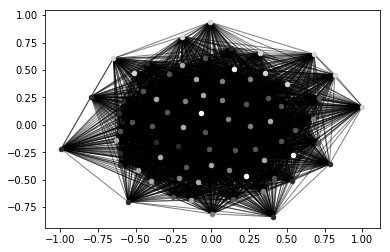

In [182]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('jaccard_domain.csv', names=["Hashtags", "Jaccard"])

def filter_df(x):
    nodes = x.split(',')
    if(len(nodes) > 1):
        edgelist.append((nodes[0].strip('[]()\\ '), nodes[1].strip('[]()\\ ')))
    return nodes[0].strip('[]() ')

df['Nodes'] = list(map(lambda x: filter_df(x), df['Hashtags']))
G = nx.Graph()
G.add_nodes_from(list(df['Nodes'])[1:])
jaccard = list(df['Jaccard'][1:])
i = 0
for edge in list(df['Hashtags'][1:]):
    edge_list = str(edge).split(',')
    print(len(edge_list))
    G.add_edge(edge_list[0].strip("() "), edge_list[1].strip("() "), weight=jaccard[i])
    i += 1
# # #first compute the best partition
partition = community.best_partition(G)
with open('community_detect.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in partition.items():
        writer.writerow([key, value])
        
modd = community.modularity(partition, G)
print("Modularity Score: {}".format(modd))


# drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.savefig("Louvain_Graph.png", format="PNG")
# plt.show()

In [184]:
## Coincidence
df = pd.read_csv('~/Desktop/hashtag_coincidence.csv', names=["Hashtags", "Times"])
nodelist = []
edge_dict = []
i = 0
def filter_df(x):
    nodes = x.split(',')
    nodelist.append(nodes[0].strip('[]() '))
    nodelist.append(nodes[1].strip('[]() '))
    return 0

def build_graph(x):
    nodes = x.split(',')
    G.add_edge(nodes[0].strip('[]() '), nodes[1].strip('[]() '), weight=df['Times'][i])
    
list(map(lambda x: filter_df(x), df['Hashtags']))
G = nx.Graph()
G.add_nodes_from(nodes)
list(map(lambda x: build_graph(x), df['Hashtags']))

# Build Bridges
all_bridges = set(nx.bridges(G))
local_bridges = set(nx.local_bridges(G))
local_bridges_span = set(nx.local_bridges(G, with_span=True))
global_bridges = all_bridges - local_bridges

# Write Bridges to CSV
with open('bridges_span.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Bridge", "Span", "Global Bridges"])
    for row in local_bridges_span:
        writer.writerow([(row[0], row[1]), row[2], global_bridges])


# Clustering 
clust_dict = nx.clustering(G)

# print(clust_dict)
with open('clustering_coefficent.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Node", "Coefficent"])
    for key, value in clust_dict.items():
        writer.writerow([key, value])

# Subcomponents
sub_graphs = nx.number_connected_components(G)

print("Local Bridges: {}, Global Bridges: {}".format(len(local_bridges), len(global_bridges)))
print("Number Subcomponents: {}".format(sub_graphs))
partition = community.best_partition(G)
with open('community_detect.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in partition.items():
        writer.writerow([key, value])
        
modd = community.modularity(partition, G)
print("Modularity Score: {}".format(modd))
# df

Local Bridges: 1665, Global Bridges: 1481
Number Subcomponents: 712
Modularity Score: 0.7050979587685249


In [185]:
df = pd.read_csv('~/Desktop/hashtag_coincidence.csv', names=["Hashtag", "Community"])
df


,Hashtag,Community
0,"(""'racism'"", ""'misogyny'"")",2
1,"(""'bluewavecoming2018'"", ""'gotv'"")",1
2,"(""'brunette'"", ""'culoinbocca'"")",1
3,"(""'ho'"", ""'nevergiveup'"")",4
4,"(""'duke'"", ""'kris'"")",6
5,"(""'nwo'"", ""'rino'"")",1
6,"(""'gemstate'"", ""'bluewave'"")",3
7,"(""'debrahaaland'"", ""'women'"")",1
8,"(""'lgtbq'"", ""'jaredpolis'"")",2
9,"(""'ivotedblue'"", ""'ks03'"")",1
